
# The customers who most likely  invite new customers with high spends in the shop


## Setting the environment 

In [16]:
import pandas as pd
import numpy as np
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  
from scipy import stats
from collections import defaultdict
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn import utils

## Load the Data


In [17]:
df=pd.read_csv('./data/bestsecret_analysis_test_data.csv')

df.head()

,CUSTOMER_ID,CUSTOMER_CREATED_TIMESTAMP,CUSTOMER_GENDER,CUSTOMER_REGISTRATION_CHANNEL,INVITER_CUSTOMER_ID,QTY_ORDERS,REVENUE,FIRST_ORDER_DATE,LAST_ORDER_DATE
0,1,2012-10-08 11:49:43.755,male,other,NaN,0,NaN,NaN,NaN
1,2,2013-08-26 15:44:11.173,female,viral,42921.0,0,NaN,NaN,NaN
2,3,2014-02-08 20:42:39.698,male,viral,42922.0,11,754.0499,2014-09-25 00:00:00.000,2017-01-29 00:00:00.000
3,4,2014-02-09 07:48:45.611,male,other,NaN,0,NaN,NaN,NaN
4,5,2014-04-02 01:09:20.439,female,viral,42923.0,0,NaN,NaN,NaN


## Data Cleaning 
We need to select  columns which are relevant to the task. Additionally, we remove NaN-values from CUSTOMER_REGISTRATION_CHANNEL field:

In [18]:
df= df[ ['CUSTOMER_ID', 'CUSTOMER_REGISTRATION_CHANNEL', 'INVITER_CUSTOMER_ID', 'QTY_ORDERS','REVENUE'] ]

df= df[df['CUSTOMER_REGISTRATION_CHANNEL'].notna()]

df.head()

,CUSTOMER_ID,CUSTOMER_REGISTRATION_CHANNEL,INVITER_CUSTOMER_ID,QTY_ORDERS,REVENUE
0,1,other,NaN,0,NaN
1,2,viral,42921.0,0,NaN
2,3,viral,42922.0,11,754.0499
3,4,other,NaN,0,NaN
4,5,viral,42923.0,0,NaN


Here we check the data types. Later, INVITER_CUSTOMER_ID should be converted to int type.

In [19]:
df.dtypes

CUSTOMER_ID                        int64
CUSTOMER_REGISTRATION_CHANNEL     object
INVITER_CUSTOMER_ID              float64
QTY_ORDERS                         int64
REVENUE                          float64
dtype: object

## Data Visualization
Let us see how many of our customers are indeed invited by the others in the shop. As shown in the figure, 17.8% of customers are joined via others invitations.

other 51
viral 7642
partnerprogram 264
affiliate 34962


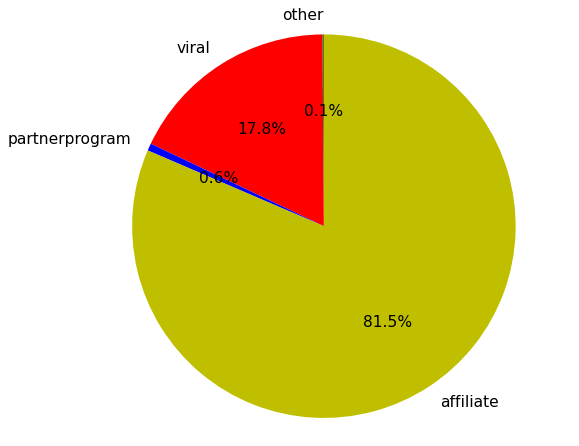

In [20]:
counter = Counter(df['CUSTOMER_REGISTRATION_CHANNEL'].tolist() )

cas_counter={}
for k,v in counter.items():
     cas_counter[k]=v
        
     print(k,v)   


labels_chart=[]
sizes=[]
for r in cas_counter:
    
    labels_chart.append(r)
    sizes.append(cas_counter[r] )

figure(figsize=(8, 7), dpi=80)

colors=['g', 'r',  'b', 'y']

plt.pie(sizes,labels=labels_chart, colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})

plt.axis('equal')

plt.show()

Here, we convert INVITER_CUSTOMER_ID from float to int:

In [21]:
df= df[df['INVITER_CUSTOMER_ID'].notna()]

df= df[df['REVENUE'].notna()]

df['INVITER_CUSTOMER_ID'] = df['INVITER_CUSTOMER_ID'].astype(float).astype(int)

df.head()

,CUSTOMER_ID,CUSTOMER_REGISTRATION_CHANNEL,INVITER_CUSTOMER_ID,QTY_ORDERS,REVENUE
2,3,viral,42922,11,754.0499
8,9,viral,42925,1,101.8767
44,45,viral,42927,79,3257.0435
66,67,viral,42932,40,3447.0640
67,68,viral,42933,3,252.0335


We need customers who are invited by others, thus select customers with the label "viral":

In [22]:
df=df.loc[df['CUSTOMER_REGISTRATION_CHANNEL'] == "viral"]
df.head()

,CUSTOMER_ID,CUSTOMER_REGISTRATION_CHANNEL,INVITER_CUSTOMER_ID,QTY_ORDERS,REVENUE
2,3,viral,42922,11,754.0499
8,9,viral,42925,1,101.8767
44,45,viral,42927,79,3257.0435
66,67,viral,42932,40,3447.0640
67,68,viral,42933,3,252.0335


### Order Distribution

maximum number of orders: 752
minimum number of orders: 1
most frequent number of orders: (1, 554)


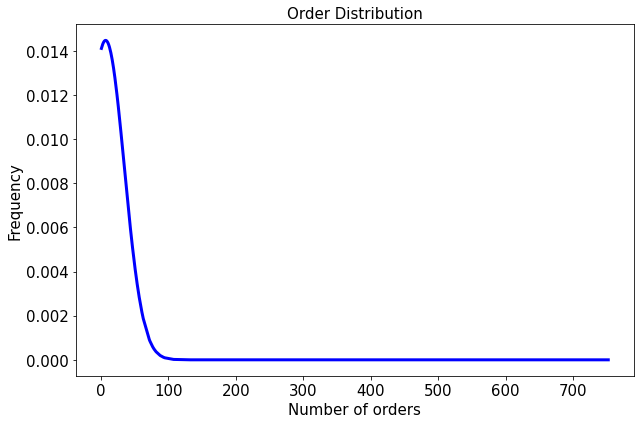

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

ax.grid(True)
ax.grid(linestyle=':')

print('maximum number of orders:',df['QTY_ORDERS'].max())
print('minimum number of orders:',df['QTY_ORDERS'].min())

counter = Counter(df['QTY_ORDERS'].tolist() )

print('most frequent number of orders:',counter.most_common(1)[0])

ORDERS=df['QTY_ORDERS'].tolist()

ORDERS.sort()
hmean = np.mean(ORDERS)
hstd = np.std(ORDERS)
pdf = stats.norm.pdf(ORDERS, hmean, hstd)
plt.plot(ORDERS, pdf, color= 'blue', linewidth=3)

plt.xlabel('Number of orders', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Order Distribution', fontsize=15)


plt.tick_params(axis='both',labelsize=15)
fig.tight_layout()
plt.show()

According to the order distribution, many of customers have a few number of orders, e.g. in the range of [1, 10]. The highest number of orders via the viral channel is 752 times. The curve is skewed, which means few customers indeed ordered high numbers of items.

### Revenue Distribution

maximum REVENUE: 214924.3695


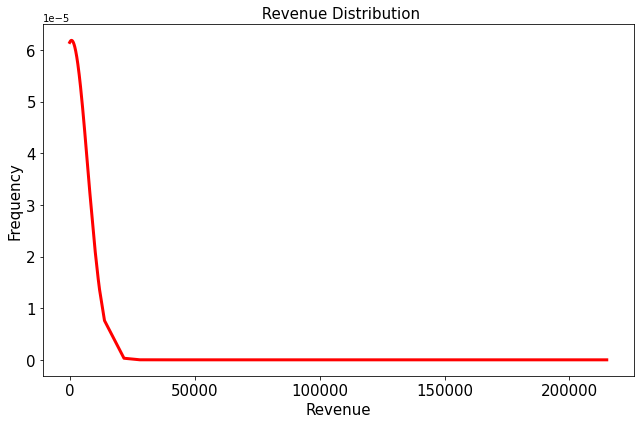

In [24]:

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

ax.grid(True)
ax.grid(linestyle=':')

print('maximum REVENUE:', df['REVENUE'].max())

REVENUE=df['REVENUE'].tolist()


REVENUE.sort()
hmean = np.mean(REVENUE)
hstd = np.std(REVENUE)
pdf = stats.norm.pdf(REVENUE, hmean, hstd)
plt.plot(REVENUE, pdf, color= 'r', linewidth=3)

plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title(' Revenue Distribution', fontsize=15)


plt.tick_params(axis='both',labelsize=15)
fig.tight_layout()
plt.show()

 According to the revenue distribution, the highest revenue via the viral channel is around 214924.3695. The curve is skewed, which means few customers bring very high revenue to the company.

## Selecting the Customer List
Here we group inviters based on revenue they brought to the company. Indeed, the revenue column shows how much income each inviter in total brought to the company.

In [25]:
df_group= df.groupby(["INVITER_CUSTOMER_ID"]).sum().sort_values("REVENUE", ascending=False)
df_group

,CUSTOMER_ID,QTY_ORDERS,REVENUE
INVITER_CUSTOMER_ID,,,
43212,537,752,214924.3695
537,19674,300,43223.2377
44344,7846,133,28080.9605
44100,6168,223,21731.5239
43161,447,73,13928.3513
...,...,...,...
43160,446,1,-1.2866
44876,8900,1,-1.4801
43576,1210,1,-1.9300


We need the inviters who brought more than 3,000 € revenue to the company.

In [26]:
df_new= df_group.loc[ (df_group['REVENUE'] > 3000)]

df_new.head()


,CUSTOMER_ID,QTY_ORDERS,REVENUE
INVITER_CUSTOMER_ID,,,
43212,537,752,214924.3695
537,19674,300,43223.2377
44344,7846,133,28080.9605
44100,6168,223,21731.5239
43161,447,73,13928.3513


We write the customer list to a csv file:

In [27]:
df_final=df_new[ [ 'REVENUE']]

df_final.to_csv('customer_list.csv', sep=',', encoding='utf-8')


Some of the inviter IDs with high revenue:

In [28]:
df_final=pd.read_csv('customer_list.csv')
df_final.head(15)

,INVITER_CUSTOMER_ID,REVENUE
0,43212,214924.3695
1,537,43223.2377
2,44344,28080.9605
3,44100,21731.5239
4,43161,13928.3513
5,42951,12217.9504
6,43955,11415.5129
7,43016,10230.1639
8,42935,10222.9525
9,43092,10049.3595


Here we visualize the inviters with high revenue:

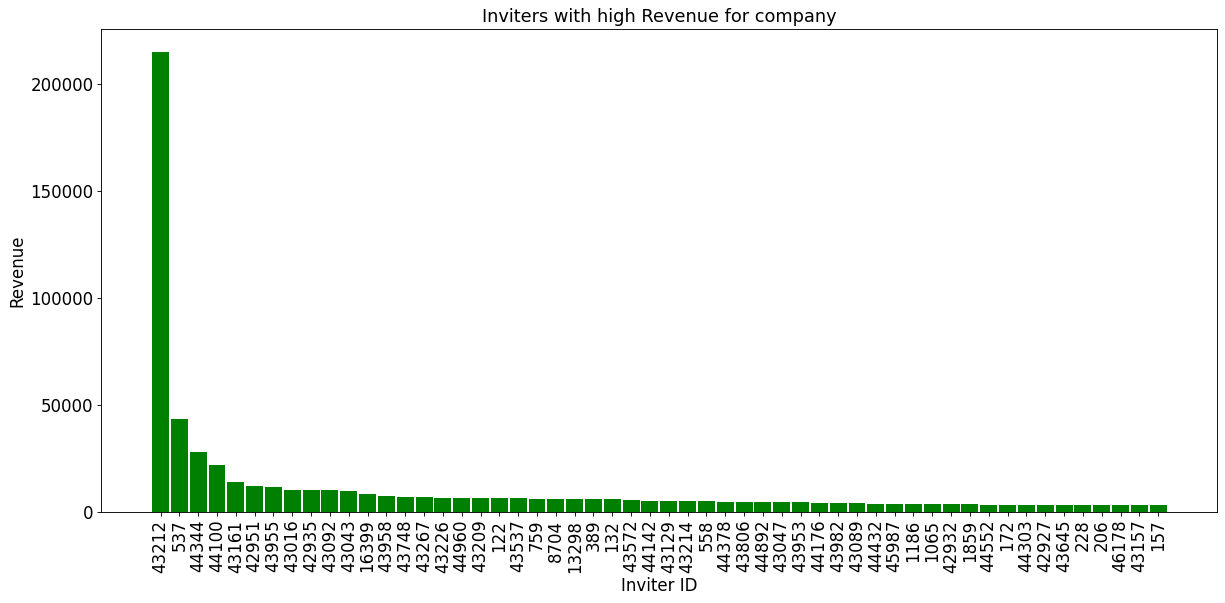

In [29]:

counter = Counter(df_final['INVITER_CUSTOMER_ID'].tolist() )

revenue=[]

for index, row in df_final.iterrows():
    
    revenue.append((int(row['INVITER_CUSTOMER_ID']), row['REVENUE']))


final_list= sorted( revenue , key=lambda x: x[1], reverse=True)


ids, freq=[], []

for i, j in final_list:
    
     ids.append(i)
     freq.append(j)
    

from matplotlib.pyplot import figure

figure(figsize=(18, 8), dpi=80)

height = freq

bars = tuple(ids)
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color="g", width=0.9)
plt.xticks(y_pos, bars)


plt.title('Inviters with high Revenue for company', fontsize=16)

plt.ylabel('Revenue', fontsize=15)
plt.xlabel('Inviter ID', fontsize=15)

plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize=15)


It can be seen who (customer ID) can be selected as a potential inviter to earn more revenue for the company.

## Additional Work


We can also follow the invitation chain to calculate the overall revenue that friends of friend can bring to the company.